# Machine Learning Foundation

## Course 3, Part c: Support Vector Machines DEMO (Own Example)

### Diabetes Data Set

In [1]:
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
os.chdir('/users/salahkaf/desktop/data')
from colorsetup import colors, palette
sns.set_palette(palette)

In [2]:
filepath = 'Diabetes_data.csv'
data = pd.read_csv(filepath, sep=',')

In [3]:
data.head(3)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive


In [4]:
y = (data['class'] == 'Positive').astype(int)
y.head(3)

0    1
1    1
2    1
Name: class, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in data.columns:
    data[i] = le.fit_transform(data[i])

In [6]:
fields = list(data.columns[:-1])  # everything except "class"
correlations = data[fields].corrwith(y) # the series y must be same length as df, which is ture.
correlations.sort_values(inplace=True)
correlations

Gender               -0.449233
Alopecia             -0.267512
Itching              -0.013384
delayed healing       0.046980
Obesity               0.072173
Age                   0.106419
Genital thrush        0.110288
muscle stiffness      0.122474
weakness              0.243275
visual blurring       0.251300
Irritability          0.299467
Polyphagia            0.342504
partial paresis       0.432288
sudden weight loss    0.436568
Polydipsia            0.648734
Polyuria              0.665922
dtype: float64

In [7]:
# sns.pairplot(data, hue = 'class')

### Based on the pair plot, it seems there is some kind of seperation in the data.

In [8]:
sns.set_context('talk')
sns.set_palette(palette)
sns.set_style('white')

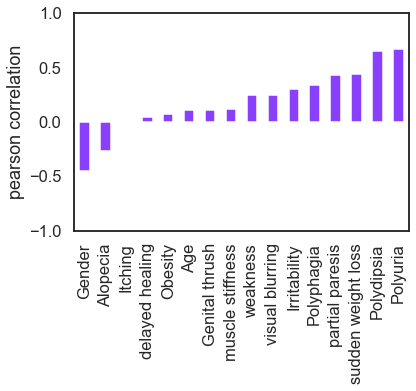

In [9]:
ax = correlations.plot(kind='bar', color=colors[3])
ax.set(ylim=[-1, 1], ylabel='pearson correlation');

In [10]:
# Scaling is important in SVM as well

from sklearn.preprocessing import MinMaxScaler
fields = correlations.map(abs).sort_values().iloc[-2:].index # Pulling out the top 2 correlated features 
print(fields)
X = data[fields] # Use their index as a tool to identify X
scaler = MinMaxScaler()
X = scaler.fit_transform(X) # Makes it a NumPy array
X = pd.DataFrame(X, columns=['%s_scaled' % fld for fld in fields]) # Return to data frame shape
print(X.columns)

Index(['Polydipsia', 'Polyuria'], dtype='object')
Index(['Polydipsia_scaled', 'Polyuria_scaled'], dtype='object')


In [11]:
# We took the most two correlated features with the target variable.
X.head(2)

,Polydipsia_scaled,Polyuria_scaled
0,1.0,0.0
1,0.0,0.0


## Part 2: Linear Decision Boundary

Our goal is to look at the decision boundary of a LinearSVC classifier on this dataset. Check out [this example](http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py) in sklearn's documentation. 

* Fit a Linear Support Vector Machine Classifier to `X`, `y`.
* Pick 300 samples from `X`. Get the corresponding `y` value. Store them in variables `X_color` and `y_color`. This is because original dataset is too large and it produces a crowded plot.
* Modify `y_color` so that it has the value "red" instead of 1 and 'yellow' instead of 0.
* Scatter plot X_color's columns. Use the keyword argument "color=y_color" to color code samples.
* Use the code snippet below to plot the decision surface in a color coded way.

```python
x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = *[YOUR MODEL]*.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=colors, alpha=.3)
```

With LinearSVC, it is easy to experiment with different parameter choices and see the decision boundary.

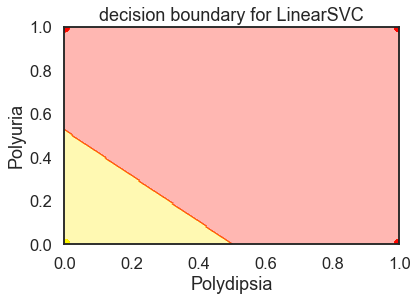

In [12]:
from sklearn.svm import LinearSVC

LSVC = LinearSVC()
LSVC.fit(X, y) # Three atrributes only. (Two dimensions X, and y)

X_color = X.sample(300, random_state=45) # Taking random 300 samples (These samples in this example will be on the corners)
y_color = y.loc[X_color.index] # Matching the index 
y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow') # Mapped it from 1s and 0s to reds and yellows
ax = plt.axes() # initiate our bounding box
ax.scatter(
    X_color.iloc[:, 0], X_color.iloc[:, 1], # All rows, first column, all our rows, second column
    color=y_color, alpha=1)
# -----------
x_axis, y_axis = np.arange(0, 1.005, .005), np.arange(0, 1.005, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = LSVC.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
# -----------
ax.set(
    xlabel=fields[0],
    ylabel=fields[1],
    xlim=[0, 1],
    ylim=[0, 1],
    title='decision boundary for LinearSVC');

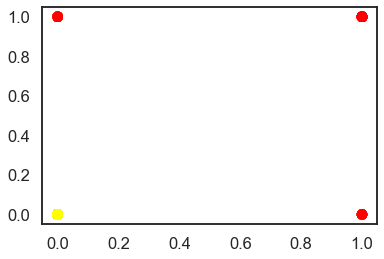

In [13]:
# We can also plot a scatter plot to understand more the previous plot

X_color = X.sample(300, random_state=45) # Taking random 300 samples (These samples in this example will be on the corners)
y_color = y.loc[X_color.index] # Matching the index 
y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow') # Mapped it from 1s and 0s to reds and yellows
ax = plt.axes() # initiate our bounding box
ax.scatter(
    X_color.iloc[:, 0], X_color.iloc[:, 1], # All rows, first column, all our rows, second column
    color=y_color, alpha=1)

In [14]:
# Based on this visualization, high value of Polydipsia and polyuria indicators of diabetes.

## Part 3: Gaussian Kernel

Let's now fit a Gaussian kernel SVC and see how the decision boundary changes.

* Consolidate the code snippets in Question 2 into one function which takes in an estimator, `X` and `y`, and produces the final plot with decision boundary. The steps are:
    <ol>
     <li> fit model
     <li> get sample 300 records from X and the corresponding y's
     <li> create grid, predict, plot using ax.contourf
     <li> add on the scatter plot
    </ol>
* After copying and pasting code, the finished function uses the input `estimator` and not the LinearSVC model.
* For the following values of `gamma`, create a Gaussian Kernel SVC and plot the decision boundary.  
`gammas = [.5, 1, 2, 10]`
* Holding `gamma` constant, we plot the decision boundary for various values of `C`: 
`[.1, 1, 10]`

In [15]:
def plot_decision_boundary(estimator, X, y):
    estimator.fit(X, y)
    X_color = X.sample(300)
    y_color = y.loc[X_color.index]
    y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow') 
    x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
    xx, yy = np.meshgrid(x_axis, y_axis)
    xx_ravel = xx.ravel()
    yy_ravel = yy.ravel()
    X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
    y_grid_predictions = estimator.predict(X_grid)
    y_grid_predictions = y_grid_predictions.reshape(xx.shape)

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
    ax.scatter(X_color.iloc[:, 0], X_color.iloc[:, 1], color=y_color, alpha=1)
    ax.set(
        xlabel=fields[0],
        ylabel=fields[1],
        title=str(estimator))

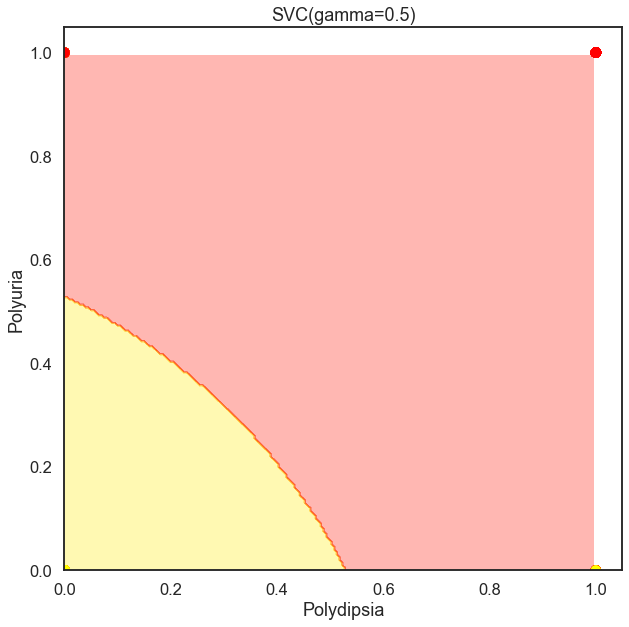

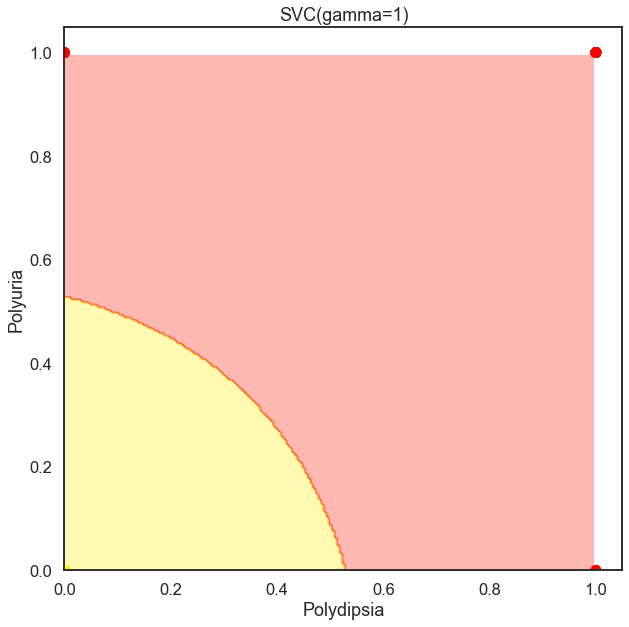

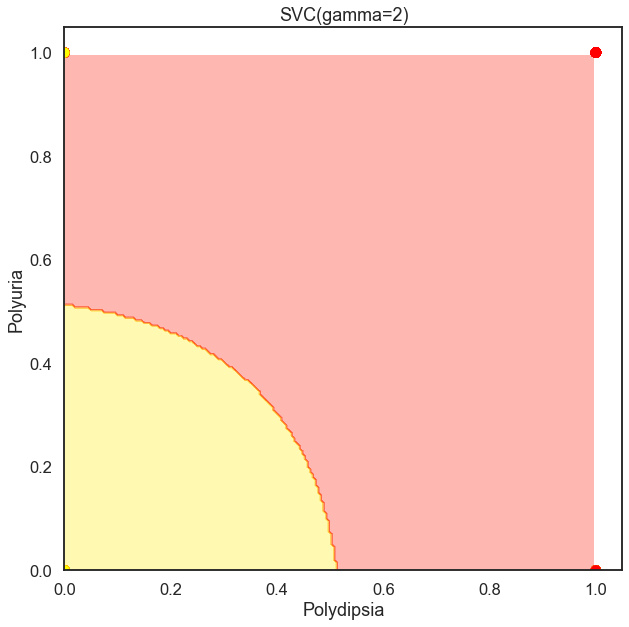

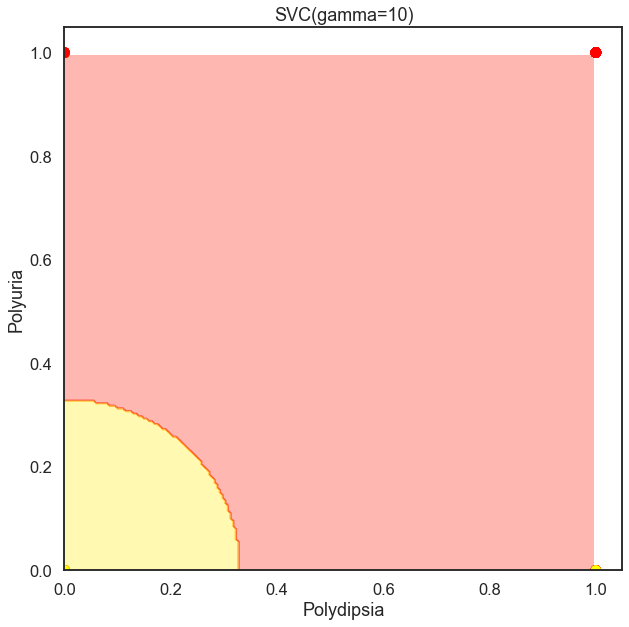

In [16]:
from sklearn.svm import SVC

gammas = [.5, 1, 2, 10] # Low gamma = high regularization
for gamma in gammas:
    SVC_Gaussian = SVC(kernel='rbf', gamma=gamma)
    plot_decision_boundary(SVC_Gaussian, X, y)

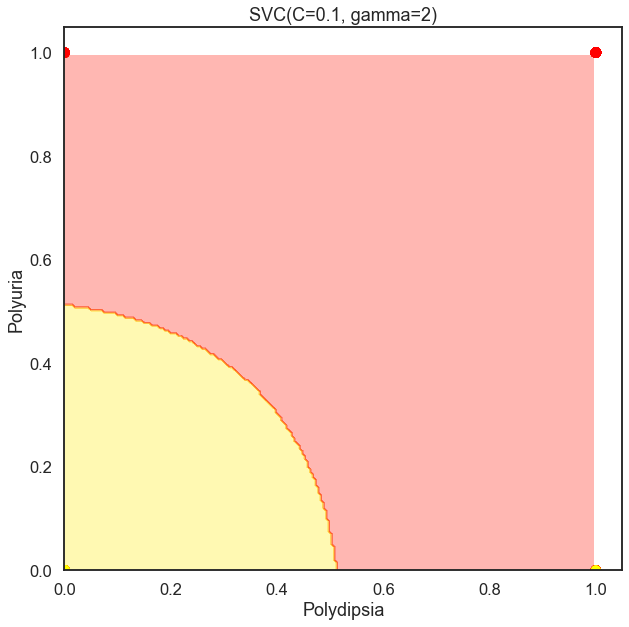

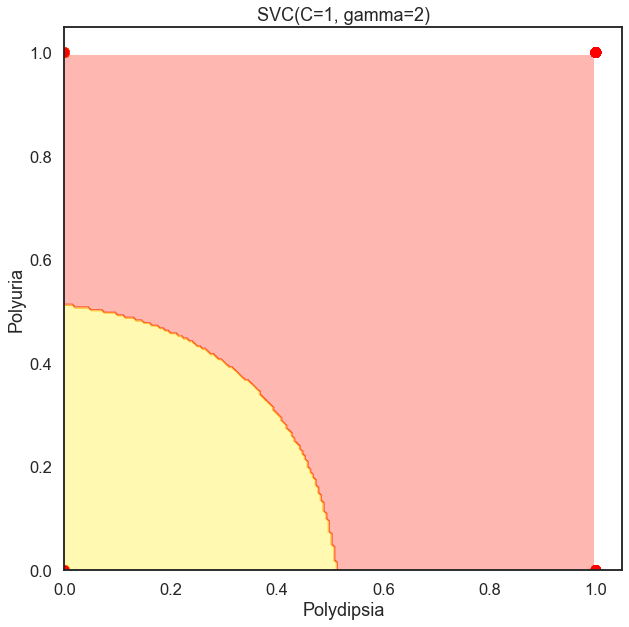

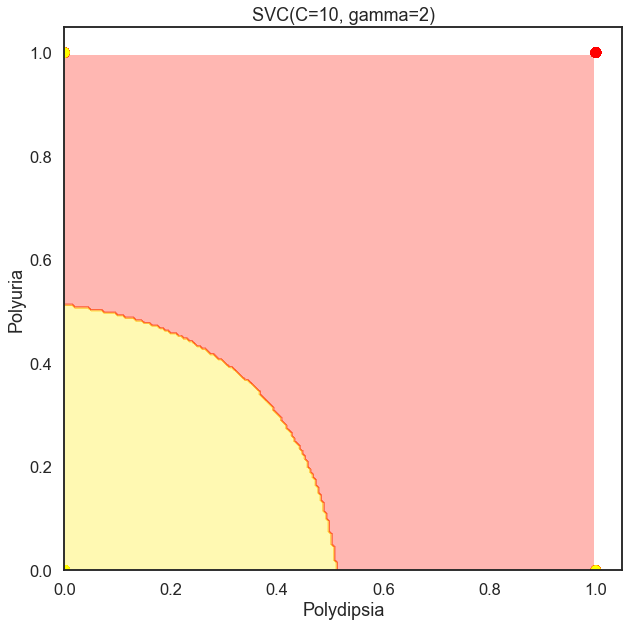

In [17]:
Cs = [.1, 1, 10] # Low C = high regularization
for C in Cs:
    SVC_Gaussian = SVC(kernel='rbf', gamma=2, C=C)
    plot_decision_boundary(SVC_Gaussian, X, y)

## Part 4: Comparing Kernel Execution Times

In this exercise, we will compare the fitting times between SVC vs Nystroem with rbf kernel.  
<br><br>
Jupyter Notebooks provide a useful magic function **`%timeit`** which executes a line and prints out the time it took to fit. If we type **`%%timeit`** in the beginning of the cell, it will output the execution time.

We proceed with the following steps:
* Create `y` from data.color, and `X` from the rest of the columns.
* Use `%%timeit` to get the time for fitting an SVC with rbf kernel.
* Use `%%timeit` to get the time for the following: fit_transform the data with Nystroem and then fit a SGDClassifier.

Nystroem+SGD will take much shorter to fit. This difference will be more pronounced if the dataset was bigger.

* Make 5 copies of X and concatenate them
* Make 5 copies of y and concatenate them
* Compare the time it takes to fit the both methods above

In [18]:
# Reading the file again
filepath = 'Diabetes_data.csv'
data = pd.read_csv(filepath, sep=',')
le = LabelEncoder()
for i in data.columns[:-1]:
    data[i] = le.fit_transform(data[i])

In [19]:
data.head(3)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,16,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive
1,34,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive
2,17,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive


In [20]:
from sklearn.kernel_approximation import Nystroem # to transform attributes into a higher dimensional space
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier # is a way to speed up our linear classification.
#Not only we are opproximating our mapping to higher dimensions,
#but we're also going to come up with a bit of an approximation to our linear classifier as well

y = data["class"] == 'Positive'
X = data[data.columns[:-1]]

kwargs = {'kernel': 'rbf'} # for the kernal argument, we pass rbf
svc = SVC(**kwargs) # Passing the dictionary
nystroem = Nystroem(**kwargs)
sgd = SGDClassifier()

In [21]:
%%timeit
svc.fit(X, y)

15.5 ms ± 726 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [22]:
%%timeit
X_transformed = nystroem.fit_transform(X)
sgd.fit(X_transformed, y)

10.2 ms ± 900 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [23]:
print(X.shape)
print(nystroem.fit_transform(X).shape) # We got a higher dimensions of 100 columns

(520, 16)
(520, 100)


In [24]:
# Make it 5 times bigger, to compare timing. 

X2 = pd.concat([X]*5)
y2 = pd.concat([y]*5)

print(X2.shape)
print(y2.shape)

(2600, 16)
(2600,)


In [25]:
### Just using SVS, vs using the kernal approximation

In [26]:
%timeit svc.fit(X2, y2)

286 ms ± 30.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [27]:
%%timeit
X2_transformed = nystroem.fit_transform(X2)
sgd.fit(X2_transformed, y2)

31.5 ms ± 8.22 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Machine Learning Foundation (C) 2020 IBM Corporation